In [1]:
# Support for maths
import numpy as np
# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline
# Importing data library
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# GPy: Gaussian processess libary
import GPy
from IPython.display import display

plt.rcParams.update({'font.size': 32})

In [2]:
# Pembacaan File Data Polusi Udara ISPU Excel
DKI1 = pd.read_excel("./Data/Normalization/DATA ISPU - Normalization.xlsx", sheet_name="DKI1")

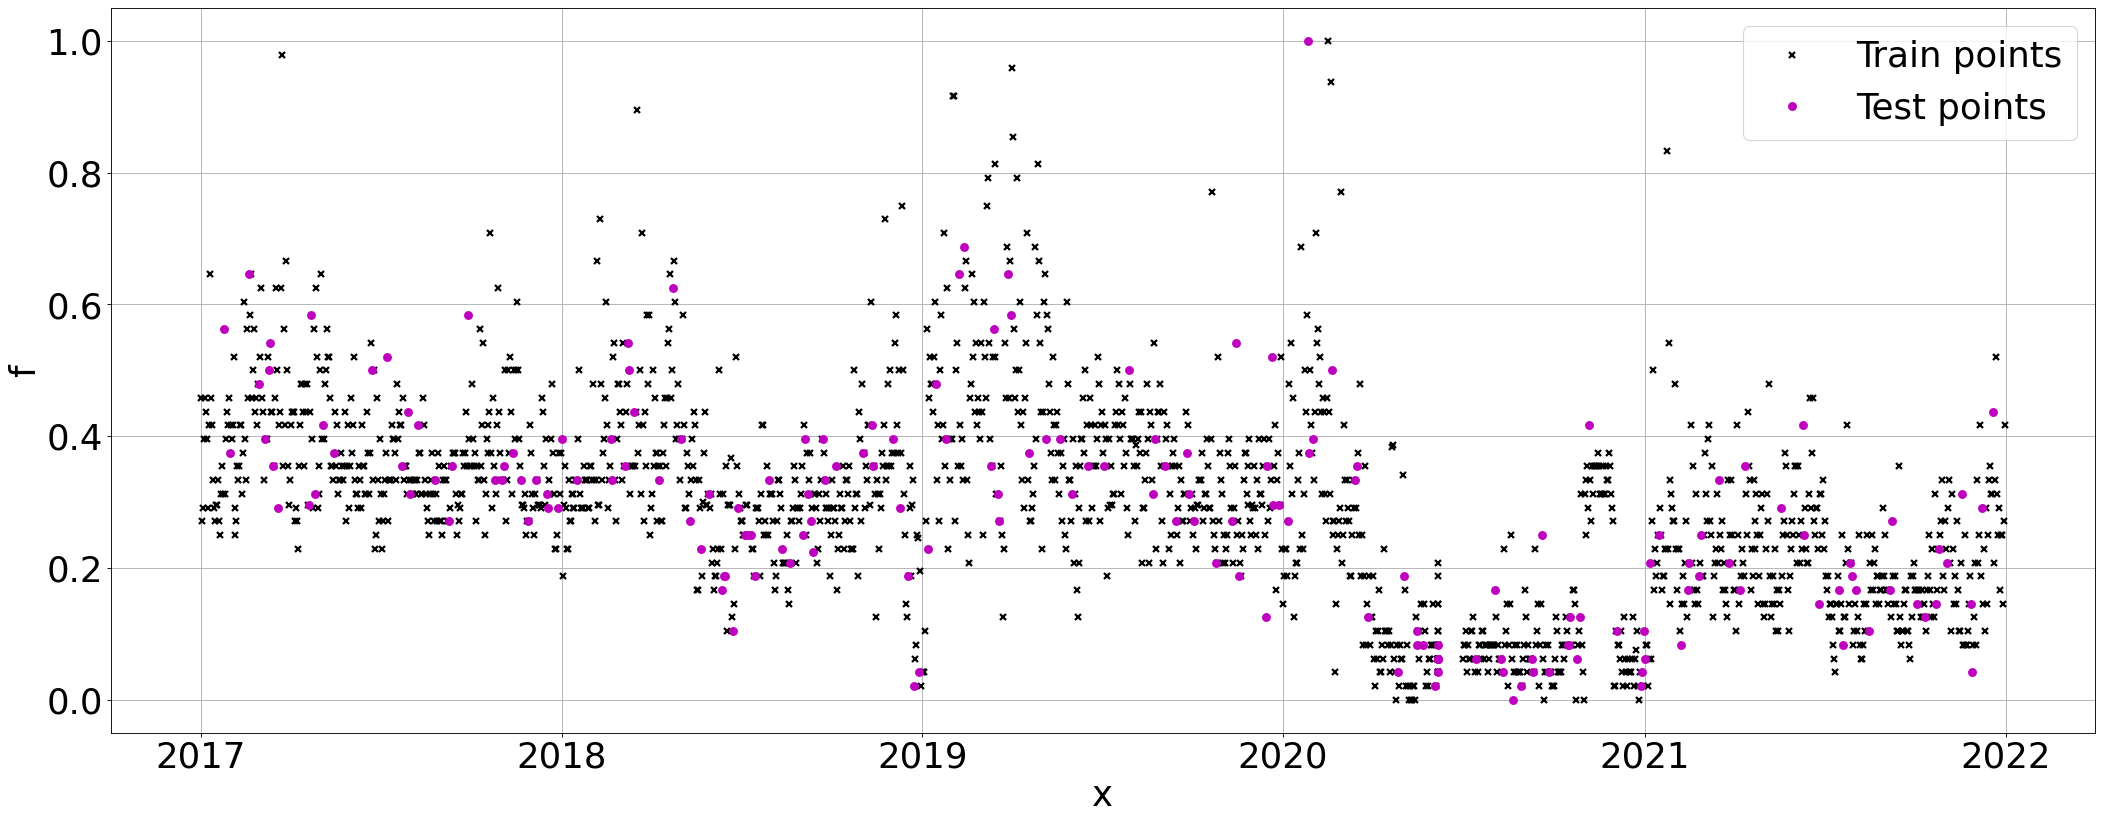

In [3]:
# X = np.array(DKI1.Tanggal.astype('int64') // 10**9)
X = np.array(DKI1.index).reshape(-1,1)
# X = np.array(DKI1['Tanggal']).reshape(-1,1)
Y = np.array(DKI1['CO']).reshape(-1,1)

from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.1, random_state=42, shuffle=True)

# Plot observations
plt.figure(figsize=(32, 12), dpi=80)
plt.plot(np.array(DKI1['Tanggal'].loc[train_X.flatten()]).reshape(-1,1), train_Y, "kx", mew=2, label='Train points')
plt.plot(np.array(DKI1['Tanggal'].loc[test_X.flatten()]).reshape(-1,1), test_Y, "mo", mew=2, label='Test points')

# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.grid()
plt.legend()

In [4]:
k8 = GPy.kern.Brownian(1)
m8 = GPy.models.GPRegression(train_X, train_Y, k8)
m8.optimize(messages=1, ipython_notebook=True)

In [5]:
# Denormalisasi
max = 51.0
min = 3.0
test_Y_denorm = (test_Y.flatten() * (max - min) + min)
prediksi_denorm = (m8.predict(test_X)[0].flatten() * (max - min) + min)

In [6]:
date = np.array(DKI1['Tanggal'].loc[test_X.flatten()])

In [7]:
d = {"Tanggal":date, "CO":test_Y_denorm, "Prediksi":prediksi_denorm}
DKI1_Prediction = pd.DataFrame(d)
DKI1_Prediction

,Tanggal,CO,Prediksi
0,2019-09-26,21.0,18.929089
1,2021-02-27,15.0,13.990327
2,2017-10-26,19.0,22.499351
3,2018-02-20,22.0,22.688728
4,2020-01-26,51.0,24.339081
...,...,...,...
178,2019-10-03,16.0,17.163842
179,2021-03-27,13.0,14.111064
180,2017-03-15,20.0,25.064289
181,2020-12-31,8.0,6.385998


In [8]:
# Penyimpanan Data Prediksi
DKI1_Prediction.to_excel('./Data/Prediction/DKI1_03_CO.xlsx', index=False)